<a href="https://colab.research.google.com/github/lenagrumbach/home_price_analysis/blob/main/home_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fredapi > /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler

plt.style.use('fivethirtyeight')
pd.options.display.max_columns=500
pd.options.display.max_rows=30
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred
# import getpass

## Accessing the API and Importing Data

In [ ]:
# fred_key = getpass.getpass('Please enter the API key ')

In [3]:
fred_key = '2ec4e757784ff0458d04a035eb9de760'

In [4]:
fred = Fred(api_key=fred_key)

In [5]:
from google.colab import drive
 
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


Date period

In [6]:
start='2000-01-01'
end= date.today()

In [7]:
sp500 = fred.get_series(series_id= 'SP500',observation_start= '2000-01-01', observation_end='2022-12-01')
sp500 = pd.DataFrame(sp500).reset_index().rename(columns={'index':'Day', 0:'SP500'})
sp500

,Day,SP500
0,2012-12-03,1409.46
1,2012-12-04,1407.05
2,2012-12-05,1409.28
3,2012-12-06,1413.94
4,2012-12-07,1418.07
...,...,...
2604,2022-11-25,4026.12
2605,2022-11-28,3963.94
2606,2022-11-29,3957.63
2607,2022-11-30,4080.11


In [8]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Day     2609 non-null   datetime64[ns]
 1   SP500   2518 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.9 KB


In [9]:
# Unemployment Rate
unemployment = fred.get_series(series_id= 'UNRATE', observation_start= start, observation_end=end)
unemployment = pd.DataFrame(unemployment).reset_index().rename(columns={'index':'Date', 0:'Unemployment'})
unemployment

,Date,Unemployment
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
...,...,...
270,2022-07-01,3.5
271,2022-08-01,3.7
272,2022-09-01,3.5
273,2022-10-01,3.7


In [10]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          275 non-null    datetime64[ns]
 1   Unemployment  275 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


In [11]:
# U.S. National Home Price Index
national_home_price = fred.get_series(series_id= 'CSUSHPINSA', observation_start= start, observation_end=end)
national_home_price = pd.DataFrame(national_home_price).reset_index().rename(columns={'index':'Date', 0:'Home_Price_Index'})
display(national_home_price)

,Date,Home_Price_Index
0,2000-01-01,100.000
1,2000-02-01,100.571
2,2000-03-01,101.466
3,2000-04-01,102.541
4,2000-05-01,103.702
...,...,...
268,2022-05-01,306.605
269,2022-06-01,308.422
270,2022-07-01,307.001
271,2022-08-01,303.472


In [12]:
national_home_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              273 non-null    datetime64[ns]
 1   Home_Price_Index  273 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


In [13]:
# Median Consumer Price Index
inflation = fred.get_series(series_id= 'MEDCPIM158SFRBCLE', observation_start= start, observation_end=end)
inflation = pd.DataFrame(inflation).reset_index().rename(columns={'index':'Date', 0:'Inflation'})
display(inflation)

,Date,Inflation
0,2000-01-01,3.851771
1,2000-02-01,2.785584
2,2000-03-01,3.416809
3,2000-04-01,2.276901
4,2000-05-01,2.853534
...,...,...
269,2022-06-01,9.130538
270,2022-07-01,6.483074
271,2022-08-01,9.222973
272,2022-09-01,8.307776


In [14]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       274 non-null    datetime64[ns]
 1   Inflation  274 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


In [15]:
# Federal Funds Effective Rate
federal_funds_rate = fred.get_series(series_id= 'FEDFUNDS', observation_start= start, observation_end=end)
federal_funds_rate = pd.DataFrame(federal_funds_rate).reset_index().rename(columns={'index':'Date', 0:'FF_Rate'})
display(federal_funds_rate)

,Date,FF_Rate
0,2000-01-01,5.45
1,2000-02-01,5.73
2,2000-03-01,5.85
3,2000-04-01,6.02
4,2000-05-01,6.27
...,...,...
270,2022-07-01,1.68
271,2022-08-01,2.33
272,2022-09-01,2.56
273,2022-10-01,3.08


##Data Cleaning and Preprocessing

In [16]:
sp500_date_conversion = sp500.groupby(sp500['Day'].dt.strftime('%m %Y')).first().rename(columns={"Day":"Month"}).reset_index(drop=True)
sp500_date_conversion['Date'] = pd.to_datetime(sp500_date_conversion['Month'].dt.year.astype(str)+'/'+sp500_date_conversion['Month'].dt.month.astype(str)+'/01')


In [17]:
sp500_month = sp500_date_conversion.drop(columns='Month').sort_values('Date').reset_index().drop(columns='index')
sp500_month.head()

,SP500,Date
0,1409.46,2012-12-01
1,1462.42,2013-01-01
2,1513.17,2013-02-01
3,1518.20,2013-03-01
4,1562.17,2013-04-01


In [18]:
sp500_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   SP500   121 non-null    float64       
 1   Date    121 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [19]:
pd.options.display.float_format = '{:,.5f}'.format

In [20]:
national_home_price_norm = national_home_price.copy()
column = 'Home_Price_Index'
national_home_price_norm[column] = MinMaxScaler().fit_transform(np.array(national_home_price_norm[column]).reshape(-1,1))
national_home_price_norm

,Date,Home_Price_Index
0,2000-01-01,0.00000
1,2000-02-01,0.00274
2,2000-03-01,0.00703
3,2000-04-01,0.01219
4,2000-05-01,0.01776
...,...,...
268,2022-05-01,0.99128
269,2022-06-01,1.00000
270,2022-07-01,0.99318
271,2022-08-01,0.97625


In [21]:
unemployment_norm = unemployment.copy()
column = 'Unemployment'
unemployment_norm[column] = MinMaxScaler().fit_transform(np.array(unemployment_norm[column]).reshape(-1,1))
unemployment_norm

,Date,Unemployment
0,2000-01-01,0.04464
1,2000-02-01,0.05357
2,2000-03-01,0.04464
3,2000-04-01,0.02679
4,2000-05-01,0.04464
...,...,...
270,2022-07-01,0.00000
271,2022-08-01,0.01786
272,2022-09-01,0.00000
273,2022-10-01,0.01786


In [22]:
inflation_norm = inflation.copy()
column = 'Inflation'
inflation_norm[column] = MinMaxScaler().fit_transform(np.array(inflation_norm[column]).reshape(-1,1))
inflation_norm

,Date,Inflation
0,2000-01-01,0.43515
1,2000-02-01,0.32302
2,2000-03-01,0.38941
3,2000-04-01,0.26953
4,2000-05-01,0.33017
...,...,...
269,2022-06-01,0.99028
270,2022-07-01,0.71186
271,2022-08-01,1.00000
272,2022-09-01,0.90376


In [23]:
federal_funds_rate_norm = federal_funds_rate.copy()
column = 'FF_Rate'
federal_funds_rate_norm[column] = MinMaxScaler().fit_transform(np.array(federal_funds_rate_norm[column]).reshape(-1,1))
federal_funds_rate_norm

,Date,FF_Rate
0,2000-01-01,0.83205
1,2000-02-01,0.87519
2,2000-03-01,0.89368
3,2000-04-01,0.91988
4,2000-05-01,0.95840
...,...,...
270,2022-07-01,0.25116
271,2022-08-01,0.35131
272,2022-09-01,0.38675
273,2022-10-01,0.46687


In [24]:
sp500_month_norm = sp500_month.copy()
column = 'SP500'
sp500_month_norm[column] = MinMaxScaler().fit_transform(np.array(sp500_month_norm[column]).reshape(-1,1))
sp500_month_norm

,SP500,Date
0,0.00000,2012-12-01
1,0.01564,2013-01-01
2,0.03062,2013-02-01
3,0.03210,2013-03-01
4,0.04509,2013-04-01
...,...,...
116,0.79985,2022-08-01
117,0.75504,2022-09-01
118,0.66989,2022-10-01
119,0.72234,2022-11-01


In [25]:
df_with_sp500_norm = national_home_price_norm.merge(unemployment_norm).merge(inflation_norm).merge(federal_funds_rate_norm).merge(sp500_month_norm)
df_with_sp500_norm.head()

,Date,Home_Price_Index,Unemployment,Inflation,FF_Rate,SP500
0,2012-12-01,0.21049,0.39286,0.21839,0.01695,0.00000
1,2013-01-01,0.21261,0.40179,0.31842,0.01387,0.01564
2,2013-02-01,0.21669,0.37500,0.28790,0.01541,0.03062
3,2013-03-01,0.23012,0.35714,0.15789,0.01387,0.03210
4,2013-04-01,0.24455,0.36607,0.24976,0.01541,0.04509


In [26]:
df_with_sp500 = national_home_price.merge(unemployment).merge(inflation).merge(federal_funds_rate).merge(sp500_month)
df_with_sp500.head()

,Date,Home_Price_Index,Unemployment,Inflation,FF_Rate,SP500
0,2012-12-01,143.87000,7.90000,1.79065,0.16000,"1,409.46000"
1,2013-01-01,144.31300,8.00000,2.74181,0.14000,"1,462.42000"
2,2013-02-01,145.16300,7.70000,2.45154,0.15000,"1,513.17000"
3,2013-03-01,147.96200,7.50000,1.21536,0.14000,"1,518.20000"
4,2013-04-01,150.97000,7.60000,2.08888,0.15000,"1,562.17000"


In [27]:
df_without_sp500_norm = national_home_price_norm.merge(unemployment_norm).merge(inflation_norm).merge(federal_funds_rate_norm)
df_without_sp500_norm.head()

,Date,Home_Price_Index,Unemployment,Inflation,FF_Rate
0,2000-01-01,0.00000,0.04464,0.43515,0.83205
1,2000-02-01,0.00274,0.05357,0.32302,0.87519
2,2000-03-01,0.00703,0.04464,0.38941,0.89368
3,2000-04-01,0.01219,0.02679,0.26953,0.91988
4,2000-05-01,0.01776,0.04464,0.33017,0.95840


In [28]:
df_without_sp500 = national_home_price.merge(unemployment).merge(inflation).merge(federal_funds_rate)
df_without_sp500.head()

,Date,Home_Price_Index,Unemployment,Inflation,FF_Rate
0,2000-01-01,100.00000,4.00000,3.85177,5.45000
1,2000-02-01,100.57100,4.10000,2.78558,5.73000
2,2000-03-01,101.46600,4.00000,3.41681,5.85000
3,2000-04-01,102.54100,3.80000,2.27690,6.02000
4,2000-05-01,103.70200,4.00000,2.85353,6.27000


### Checking correlation

In [33]:
df_with_sp500.corr()['Home_Price_Index']

Home_Price_Index    1.00000
Unemployment       -0.27939
Inflation           0.76031
FF_Rate             0.20897
SP500               0.96283
Name: Home_Price_Index, dtype: float64

In [34]:
df_without_sp500.corr()['Home_Price_Index']

Home_Price_Index    1.00000
Unemployment       -0.28620
Inflation           0.53916
FF_Rate            -0.21484
Name: Home_Price_Index, dtype: float64

## Exporting Data

In [ ]:
from google.colab import files

In [ ]:
df_with_sp500.to_excel('df_with_sp500.xlsx', index=False)
files.download('df_with_sp500.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_with_sp500_norm.to_excel('df_with_sp500_normalized.xlsx', index=False)
files.download('df_with_sp500_normalized.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_without_sp500.to_excel('df_without_sp500.xlsx', index=False)
files.download('df_without_sp500.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_without_sp500_norm.to_excel('df_without_sp500_normalized.xlsx', index=False)
files.download('df_without_sp500_normalized.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Graphics 

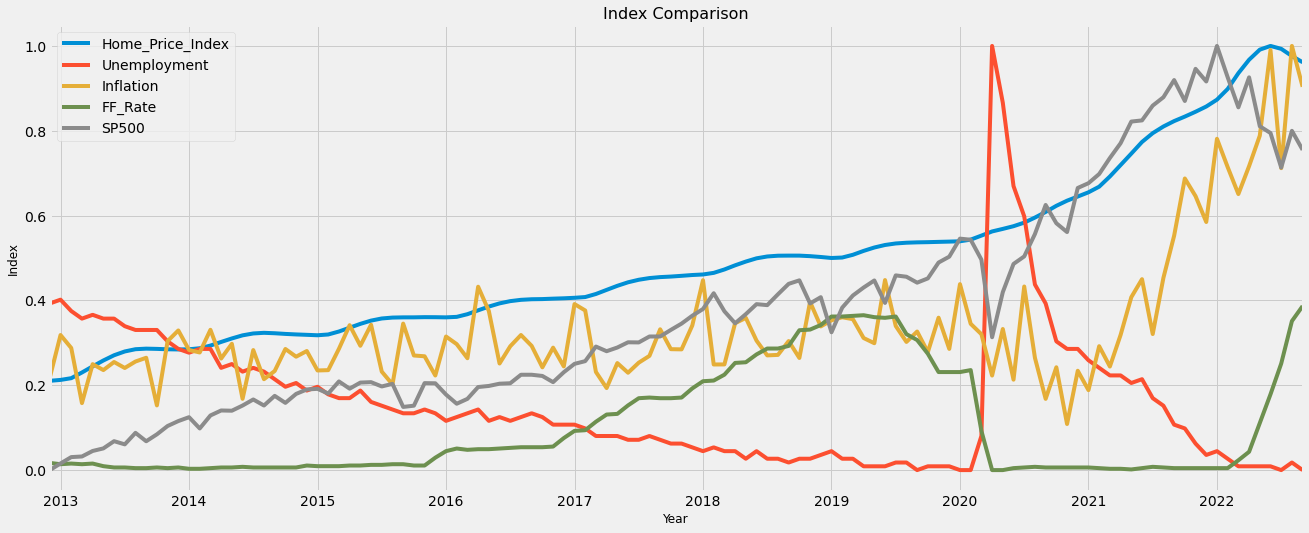

In [35]:
grp_df_with_sp500_norm = df_with_sp500_norm.plot(figsize=(20,8), x='Date')
grp_df_with_sp500_norm.set_title("Index Comparison", fontsize=16)
grp_df_with_sp500_norm.set_xlabel("Year", fontsize=12)
grp_df_with_sp500_norm.set_ylabel("Index", fontsize=12)
plt.legend(loc="upper left");

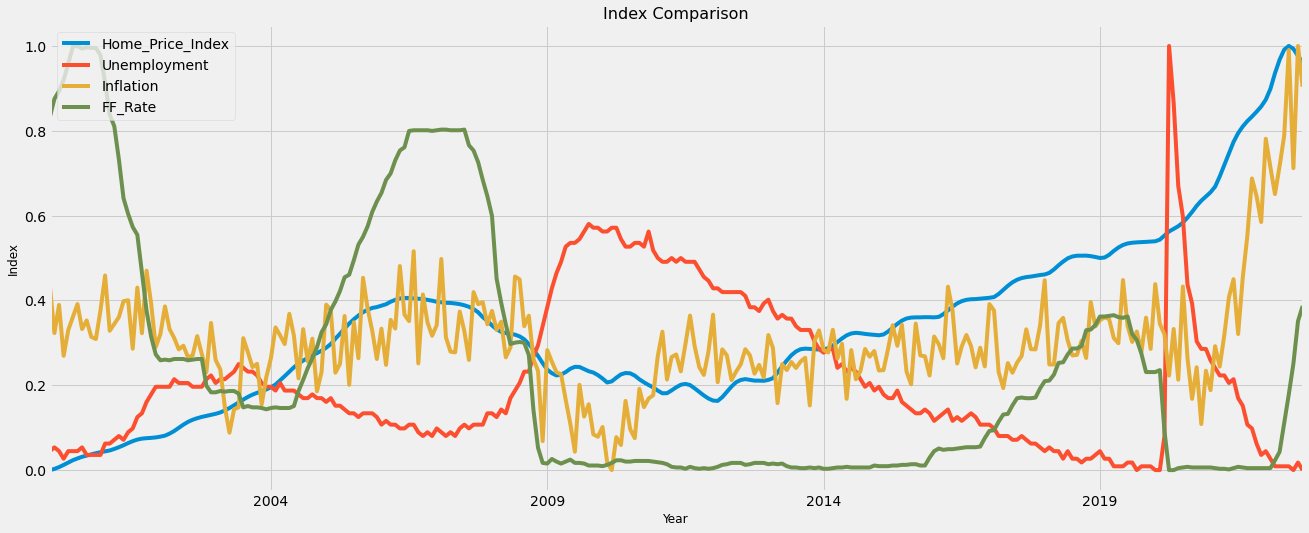

In [38]:
grp_df_without_sp500_norm = df_without_sp500_norm.plot(figsize=(20,8), x='Date')
grp_df_without_sp500_norm.set_title("Index Comparison", fontsize=16)
grp_df_without_sp500_norm.set_xlabel("Year", fontsize=12)
grp_df_without_sp500_norm.set_ylabel("Index", fontsize=12)
plt.legend(loc="upper left");